# 📦 Instalación de Librerías Necesarias para el Proyecto

Este proyecto requiere varias bibliotecas para el análisis y procesamiento de datos e imágenes. A continuación, se listan y describen:

- **pandas**: Manipulación y análisis de datos estructurados (tablas tipo DataFrame).
- **numpy**: Operaciones matemáticas avanzadas y manejo de arreglos multidimensionales.
- **matplotlib**: Visualización básica de gráficos e imágenes.
- **seaborn**: Visualización estadística avanzada basada en matplotlib.
- **opencv-python (cv2)**: Procesamiento de imágenes y visión por computadora.
- **scikit-image**: Lectura, filtrado y análisis de imágenes.
- **plotly**: Visualización interactiva y dinámica de gráficos.
- **kaggle**: Interfaz para descargar datasets desde [Kaggle.com](https://www.kaggle.com).

### ⏱ Tiempo estimado de instalación:
- Conexión buena: 3 a 7 minutos.
- Conexión lenta o Colab recién iniciado: 10 a 15 minutos.

### 💡 Recomendación:
- Si no va a trabajar directamente con imágenes, puede comentar o eliminar las siguientes librerías:
  - `opencv-python`
  - `scikit-image`

### ⚠️ Importante:
- La librería `kaggle` es necesaria solo si va a descargar datasets directamente desde Kaggle.
- Asegúrese de haber subido el archivo `kaggle.json` al entorno antes de autenticar con `KaggleApi`.


---


In [ ]:
!pip install -q kaggle
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install opencv-python
!pip install scikit-image
!pip install plotly

### 📥 Importación de librerías necesarias

Este bloque importa todas las librerías esenciales que se usarán a lo largo del proyecto. **Puede tardar alrededor de un minuto** en completarse, dependiendo del entorno y los recursos de tu máquina, ya que algunas son pesadas.

A continuación se explica el propósito de cada librería:

- **`os`**  
  Permite interactuar con el sistema operativo. Aquí se usa para cambiar la ubicación en la que `kaggle.json` será buscado (en este caso, la raíz del proyecto).

- **`kaggle.api.kaggle_api_extended.KaggleApi`**  
  Se utiliza para autenticar y descargar datasets directamente desde [Kaggle](https://www.kaggle.com).

- **`os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()`**   
  Esta línea le dice a la API de Kaggle que busque el archivo kaggle.json (con tus credenciales) en el directorio actual desde donde estás ejecutando el código. 

- **`pandas` (`pd`)**  
  Manejo y análisis de datos en estructuras tipo tabla (`DataFrame`).

- **`numpy` (`np`)**  
  Cálculo numérico y manejo eficiente de arreglos multidimensionales.

- **`shutil`**  
  Permite copiar, mover o eliminar archivos y carpetas; útil para organizar las imágenes.

- **`cv2` (OpenCV)**  
  Librería de visión por computadora para leer, modificar y procesar imágenes.

- **`matplotlib.pyplot` (`plt`)**  
  Visualización de datos mediante gráficos estáticos y personalizables.

- **`seaborn` (`sns`)**  
  Complemento de `matplotlib` para gráficos estadísticos más atractivos y fáciles de generar.

- **`plotly.graph_objs` (`go`)**  
  Generación de gráficos interactivos (por ejemplo, líneas, barras, mapas de calor).

- **`skimage.io`**  
  Lectura y escritura de imágenes desde archivos o URLs, útil para visualización y análisis.


In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

from kaggle.api.kaggle_api_extended import KaggleApi

import pandas as pd

import numpy as np

import shutil 

import cv2 

import matplotlib.pyplot as plt

import seaborn as sns

from plotly import graph_objs as go

from skimage import io

In [3]:
directorio = "zargazo_dataset"

# Verifica si existe la carpeta para el data set del zargazo, si no la crea

if not os.path.exists(directorio):
    os.makedirs(directorio)
    print(f"✅ Carpeta creada: {directorio}")
else:
    print(f"ℹ️ La carpeta ya existe: {directorio}")

ℹ️ La carpeta ya existe: zargazo_dataset


In [4]:
#verifica si el data set ya fue descargado, si no lo descarga en la carpeta correspondiente

if os.path.exists(directorio) and len(os.listdir(directorio)) > 0:
    print(f"✅ Dataset ya descargado en ./{directorio}.")
else:
    print("📥 Dataset no encontrado, descargando...")
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files("sergiogiles/sargacerosds", path=directorio, unzip=True)
    print(f"✅ Dataset descargado en ./{directorio}")

✅ Dataset ya descargado en ./zargazo_dataset.


In [ ]:
#muestra de 5 elementos de el data set destinado al entrenamiendo de la red neuronal

ruta_labels = os.path.join(directorio, "labels", "labels.csv")
df_train = pd.read_csv(ruta_labels)
datos = df_train.iloc[:,:] # Seleccionar un subconjunto
bd_lenght, bd_width = datos.shape
datos.sample(5)

,image_name,place,date,label,scene
1560,i0180.jpg,Akumal,17/07/22,bajo,playa
291,i0188.jpg,Xpu-Ha,17/07/22,bajo,playa
1349,s0355.jpg,Playa Mamitas,22/08/19,bajo,playa
227,k0925.jpg,desconocido,desconocido,nada,playa
1257,s0958.jpg,Costa Mujeres,22/09/19,bajo,playa


In [6]:
# imprimir cuales son las etiquetas únicas
print(datos.label.unique())

['nada' 'bajo' 'moderado' 'excesivo' 'abundante']


In [7]:
datos.info()
print('Tipo de datos de las etiquetas: ', type(datos['label'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2485 non-null   object
 1   place       2485 non-null   object
 2   date        2485 non-null   object
 3   label       2485 non-null   object
 4   scene       2485 non-null   object
dtypes: object(5)
memory usage: 97.2+ KB
Tipo de datos de las etiquetas:  <class 'str'>


In [8]:
datos.describe()

,image_name,place,date,label,scene
count,2485,2485,2485,2485,2485
unique,2485,474,328,5,6
top,IMG_8341.JPG,desconocido,desconocido,nada,playa
freq,1,808,785,1181,2094


<Axes: xlabel='label', ylabel='count'>

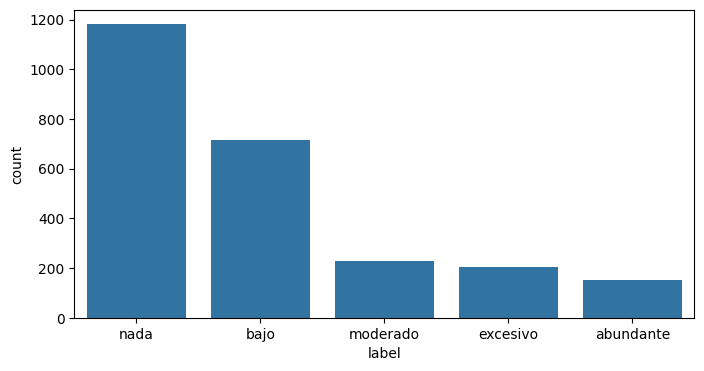

In [9]:
#graficos de distriibucion de nivel de sargazo

plt.figure(figsize=(8,4))
sns.countplot(x='label',data=datos)

<Axes: xlabel='scene', ylabel='count'>

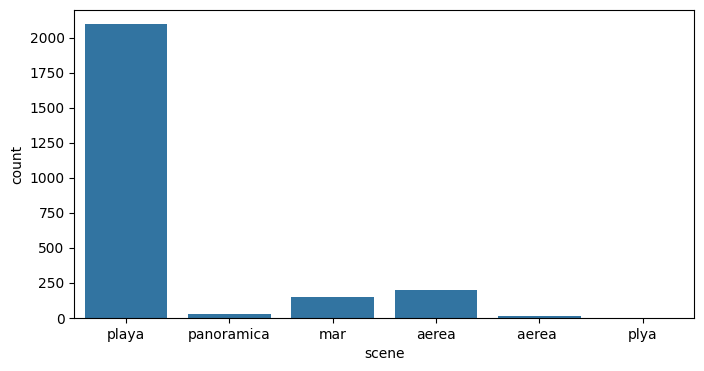

In [10]:
#graficos de distribucion de las etiquetas de las fotos

plt.figure(figsize=(8,4))
sns.countplot(x='scene',data=datos)

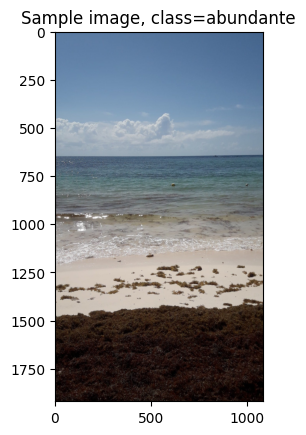

In [11]:
# Imágenes de ejemplo

import random

idx = random.randint(1, bd_lenght)
imagen_ejemplo=io.imread(directorio +"/images/"+ str(datos.image_name.iloc[idx]))

plt.title("Sample image, class=" + str(datos.label.iloc[idx]))
plt.imshow(imagen_ejemplo,vmin=0,vmax=1)

In [ ]:
# Para obtener información de la imagen podemos utilizar dtype y shape 
print('La imagen es de tipo:', imagen_ejemplo.dtype)
print("Dimensiones de la imagen (high, width, channels):", imagen_ejemplo.shape)

## 🌊 Clasificación de Sargazo en Imágenes de Playas

- En este proyecto se entrena una red neuronal para clasificar el nivel de sargazo en imágenes de playas. Utiliza un dataset con imágenes etiquetadas (por nivel de sargazo) como entrada, y el modelo aprende a predecir el nivel en nuevas imágenes. 

### codigo de red neuronal

In [ ]:
from skimage import io, transform
from PIL import Image
import time
import copy
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
from torchvision import datasets, models, transforms, utils
import torch.optim as optim
import sklearn
import sklearn.model_selection as skl
import seaborn as sn
%matplotlib inline
use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)
print("Torch version: ", torch.__version__)
print("Torchvision version: ", torchvision.__version__)
!python --version

In [ ]:
# Directorio de la carpeta donde esta el dataset
img_folder = os.path.join("zargazo_dataset","images")
csv_file = os.path.join("zargazo_dataset", "labels", "labels.csv")

# Hyper parameters
epochs = 10
current_epoch = 0
batch_size = 32
learning_rate = 0.001
run_training = True #Si deseamos que el notebook ejecute el entrenamiento
model_name = 'densenet' # Red a cargar
pretrained = True # True indica que la red se va a inicializar con los parámetros entrenados
feature_extract = False #True indica que no se actualizan los parámetros
save_weights = True

wts_str = 'w_' + model_name + '_pret_' + str(pretrained) + '_feat_' + str(feature_extract) + '_lr_'+ str(learning_rate) 
print(wts_str)

In [ ]:
class SargazoDataset(Dataset):
    def __init__(self, dataframe, images_path, transform=None):
        """
        Args:
            txt_frame_file (string): Path to the txt files with labels.
            images_path (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.sargazo_frame = dataframe
        self.root_dir = images_path
        self.transform = transform
        self.class2id = test_count = {'nada': 0, 'bajo': 1, 'moderado': 2, 'abundante': 3, 'excesivo': 4}
        
    def pil_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')
    
    def __len__(self):
        return len(self.sargazo_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # cuidado si cambia la tabla se debe de cambiar esto
        image_path = os.path.join(self.root_dir, self.sargazo_frame.iloc[idx, 0])
        
        image = self.pil_loader(image_path)
        
        try: 
            label = self.sargazo_frame.iloc[idx, 3]
        except:
            label = 'unknown'

        if self.transform is not None:
            image = self.transform(image)
            
        sample = (image, self.class2id[label])

        return sample

division del conjunto de datos
---

In [ ]:
class2id = test_count = {'nada': 0, 'bajo': 1, 'moderado': 2, 'abundante': 3, 'excesivo': 4}
id2class = {0: 'nada', 1: 'bajo', 2: 'moderado', 3: 'abundante', 4: 'excesivo'}
num_classes = len(id2class)

full_dataset = pd.read_csv(csv_file) 
full_dataset.sample(5)

#print(full_dataset.iloc[0, 4])

In [ ]:
col_labels = 'label'
random = 46 # for reproducible experiments

# Aqui se divide el conjunto de datos
train_df, valid_df = skl.train_test_split(full_dataset, test_size = 0.2, stratify = full_dataset[col_labels], random_state = random)

training_dataset = SargazoDataset(train_df, img_folder)
test_dataset = SargazoDataset(valid_df, img_folder)

print("Número de ejemplos:", len(training_dataset))

def show_image(image, label):
    plt.imshow(image, cmap = 'gray')
    plt.pause(0.001)  # pause a bit so that plots are updated

mostrar ejemplos
---

In [ ]:
fig = plt.figure()

for i in range(len(training_dataset)):
    sample = training_dataset[i]
    print(sample)
    image, label = sample
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{} Class {}'.format(i, id2class[label]))
    ax.axis('off')
    show_image(image, label)

    if i == 3:
        plt.show()
        break

descenso por gradiente
---

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs = 25, is_inception= False, save_after = 100):
    since = time.time()
    
    val_acc_history = []
    train_acc_history = []
    val_loss_history = []
    train_loss_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    #print(device)
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs -1))
        
        #Each epoch as a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            
            # Iterate over data
            for inputs, labels in iter(dataloaders[phase]):
                #print(inputs)
                #print(labels)
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                #zero the parameter gradients
                optimizer.zero_grad()
                
                #forward
                # track history
                with torch.set_grad_enabled(phase == 'train'):
                    
                    if is_inception and phase == 'train':
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                        
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        
                    _, preds = torch.max(outputs, 1)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                #statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
            epoch_loss = running_loss /len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), wts_str + '_best.pt')
            if phase == 'val':
                val_acc_history.append(epoch_acc)
                val_loss_history.append(epoch_loss)
            else:
                train_acc_history.append(epoch_acc)
                train_loss_history.append(epoch_loss)
            
            if phase == 'train' and epoch % save_after == 0 :
                torch.save(model.state_dict(), wts_str + '_epoch' + str(epoch) + '.pt')
        print()
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.4f}'.format(best_acc))
    
    #load the best model
    model.load_state_dict(best_model_wts)
    return model, val_acc_history, train_acc_history, val_loss_history, train_loss_history

In [ ]:
# set model parameters
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            # Freeze parameters
            param.requires_grad = False

crear modelo de red neuronal
---

In [ ]:
# Initialize and reshape the networks
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG16
        """
        model_ft = models.vgg16(pretrained=use_pretrained)
        #model_ft = models.vgg16(weights='IMAGENET1K_V1')
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=pretrained)

# Print the model we just instantiated
print(model_ft)

model_ft.to(device)

empieza el entrenamiento
---

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# configure paths to the description txt file and the images folder
#images_path = '../input/sargazo-dataset/sargazo_dataset/images'

# Create training and validation datasets
image_datasets = {'train': SargazoDataset(train_df, img_folder, data_transforms['train']), 'val': SargazoDataset(valid_df, img_folder, data_transforms['val'])}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

In [ ]:
# create the optimizer
model_ft = model_ft.to(device)

params_to_update = model_ft.parameters()
print("Params to learn")

if feature_extract:
    params_to_update = []
    for name, param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t", name)
else:
    for name, param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t", name)
            
optimizer_ft = optim.SGD(params_to_update, lr=learning_rate,momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Execute full training
if run_training:
    model_ft, hist, hist_t,loss_hist,loss_hist_t = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs = epochs, is_inception=(model_name=="inception"))

In [ ]:
if save_weights:
    torch.save(model_ft.state_dict(), wts_str)

graficar resultados
---

In [ ]:
# Plot the training curves of validation accuracy vs. number
#  of training epochs for the transfer learning method and
#  the model trained from scratch
vhist = []
thist = []

vhist = [h.cpu().numpy() for h in hist]
thist = [h.cpu().numpy() for h in hist_t]
#shist = [h.cpu().numpy() for h in scratch_hist]

np.save('val_history', vhist)
np.save('train_history', vhist)

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.plot(range(1,epochs+1),thist,label="Training")
plt.plot(range(1,epochs+1),vhist,label="Validation")
plt.ylim((0,1.))
plt.xticks(np.arange(1, epochs+1, 1.0))
plt.legend()
file_name = wts_str + '_acc.png'
plt.savefig(file_name)
plt.show()

In [ ]:
# Plot the training curves of validation accuracy vs. number
#  of training epochs for the transfer learning method and
#  the model trained from scratch
vhist_loss = np.array(loss_hist)
thist_loss = np.array(loss_hist_t)

np.save('val_history', vhist_loss)
np.save('train_history', thist_loss)

plt.title("Validation Loss vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(range(1,epochs+1),thist_loss,label="Training")
plt.plot(range(1,epochs+1),vhist_loss,label="Validation")
plt.ylim((0,4.))
plt.xticks(np.arange(1, epochs+1, 1.0))
plt.legend()
file_name = wts_str + '_loss.png'
plt.savefig(file_name)
plt.show()

In [ ]:
def test_model(model, dataloaders):
    print("Evaluating model")
    print(time.time())
            
    # Iterate over data
    it = 0
    for inputs, labels in dataloaders['val']:
        inputs = inputs.to(device)
        labels = labels.to(device)
                
        model.train(False)
        model.eval()
                    
        outputs = model(inputs)
                        
        _, preds = torch.max(outputs, 1)
        
        np_pred_labels = preds.cpu().numpy()
        np_real_labels = labels.cpu().numpy()
        if it == 0:
            pred_labels = np_pred_labels
            real_labels = np_real_labels
        else:
            pred_labels = np.concatenate((pred_labels,np_pred_labels))
            real_labels = np.concatenate((real_labels,np_real_labels))
        it= it+1
        
        del inputs
        del labels
        torch.cuda.empty_cache()
    
    print(time.time())
    return pred_labels,real_labels

In [ ]:
predict_labels,actual_labels = test_model(model_ft, dataloaders_dict)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual_labels,predict_labels))

In [ ]:
df_confusion = pd.crosstab(actual_labels, predict_labels,rownames=["True label"],colnames=["Predicted label"])
print(df_confusion)
df_confusion.rename(columns=id2class,index=id2class,inplace=True)
print(df_confusion)
df_confusion.to_csv('cm_exp5.csv')

In [ ]:
f, ax = plt.subplots(figsize=(9,6))

parameters = {'axes.labelsize': 10}
plt.rcParams.update(parameters)

g = sn.heatmap(df_confusion, annot = True, cmap = 'Blues',ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.savefig("CM_exp5.eps",format = "eps",bbox_inches='tight')
plt.show()

In [ ]:
df_norm_col= round(df_confusion.div(df_confusion.sum(axis=1),axis=0),2) 
print(df_norm_col)

In [ ]:
f, ax = plt.subplots(figsize=(9,6))

parameters = {'axes.labelsize': 10}
plt.rcParams.update(parameters)

g = sn.heatmap(df_norm_col, annot = True, cmap = 'Blues')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.savefig("CM_exp5_norm.eps",format = "eps",bbox_inches='tight')
plt.show()

inferencia para el challenge
---

In [ ]:
#test_file = '/kaggle/input/publicsargazods/labels/test.csv'
test_file = os.path.join("zargazo_dataset", "labels", "test.csv")

In [ ]:
test_df = pd.read_csv(test_file) 
test_df.sample(5)

In [ ]:
def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

    
model_ft.eval()
test_predictions = []
for file in test_df['image_name']:
    
    # cuidado si cambia la tabla se debe de cambiar esto
    image_path = os.path.join(img_folder, file)
    #print(image_path)
    
    image = pil_loader(image_path)
    img_transf = data_transforms['val'](image)
    img_transf = img_transf.unsqueeze(0)
    #print(img_transf.shape)
    
    #print(labels)
    img_transf = img_transf.to(device)
                       
    outputs = model_ft(img_transf)
    #print(outputs)                    
    _, preds = torch.max(outputs, 1)
    test_predictions.append(id2class[preds.cpu().numpy()[0]])
    
#print(test_predictions)
temp = {'image_name': test_df['image_name'], 'label': test_predictions}
output_df = pd.DataFrame(data=temp)
output_df.sample(10)

output_df.to_csv('outputs.csv', index=False)